In [3]:
from sklearn import cross_validation,datasets,linear_model,metrics
from matplotlib.colors import ListedColormap

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
clf_data,clf_target=datasets.make_classification(n_features=2,n_informative=2,n_classes=2,n_redundant=0,
                                                n_clusters_per_class=1,random_state=7)

In [6]:
reg_data,reg_target=datasets.make_regression(n_features=2,n_informative=1,n_targets=1,noise=5.,random_state=7)

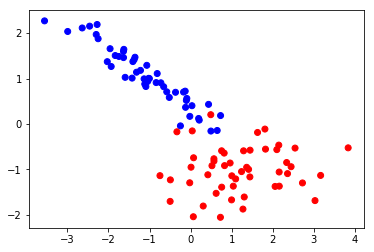

In [7]:
colors=ListedColormap(['red','blue'])
pylab.scatter(map(lambda x:x[0],clf_data),map(lambda x: x[1],clf_data),c=clf_target,cmap=colors)

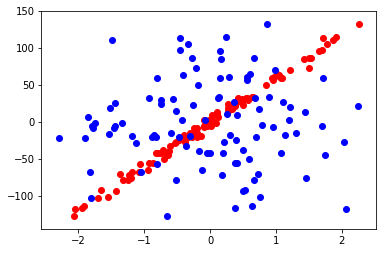

In [8]:
pylab.scatter(map(lambda x: x[1],reg_data),reg_target,color="r")
pylab.scatter(map(lambda x: x[0],reg_data),reg_target,color="b")

In [9]:
clf_train_data,clf_test_data,clf_train_labels,clf_test_labels=cross_validation.train_test_split(clf_data,clf_target,
                                                                                               test_size=0.3,random_state=1)

In [10]:
reg_train_data,reg_test_data,reg_train_labels,reg_test_labels=cross_validation.train_test_split(reg_data,reg_target,
                                                                                               test_size=0.3,random_state=1)

In [11]:
classifier=linear_model.SGDClassifier(loss="log",random_state=1)

In [13]:
classifier.fit(clf_train_data,clf_train_labels)

C:\Users\dim\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [14]:
prediction=classifier.predict(clf_test_data)

In [15]:
probability_predictions=classifier.predict_proba(clf_test_data)

In [16]:
print clf_test_labels

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [18]:
print prediction

[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [19]:
print probability_predictions

[[  0.00000000e+00   1.00000000e+00]
 [  9.99999993e-01   6.61556341e-09]
 [  9.99988143e-01   1.18567026e-05]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   4.62314295e-15]
 [  3.03803294e-09   9.99999997e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   5.05766731e-13]
 [  0.00000000e+00   1.00000000e+00]
 [  9.99999999e-01   5.18878464e-10]
 [  9.99999241e-01   7.58783839e-07]
 [  2.70446065e-04   9.99729554e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  4.89202012e-11   1.00000000e+00]
 [  1.00000000e+00   8.62325525e-11]
 [  9.97365075e-01   2.63492515e-03]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.30597714e-15]
 [  1.00000000e+00   3.28425090e-15]
 [  1.83630888e-13   1.00000000e+00]
 [  9.99999999e-01   5.19307103e-10]
 [  9.99999639e-01   3.60586359e-07]
 [  8.85166610e-01   1.14833390e-01]
 [  1.00000000e+00   7.21139609e-14]
 [  9.99999415e-01   5.85346707e-07]
 [  9.86697401e-01   1.33025990e-02]
 [  4.76887024e-02   9.52311298e-01]
 

In [28]:
float(sum([1if pair[0]==pair[1] else 0 for pair in zip(clf_test_labels,prediction)]))/len(clf_test_labels)

0.9666666666666667

In [30]:
metrics.accuracy_score(clf_test_labels,prediction)

0.96666666666666667

In [32]:
matrix=metrics.confusion_matrix(clf_test_labels,prediction)
print matrix

[[17  1]
 [ 0 12]]


In [33]:
sum([1if pair[0]==pair[1] else 0 for pair in zip(clf_test_labels,prediction)])

29

In [35]:
matrix.diagonal().sum()

29

In [36]:
metrics.precision_score(clf_test_labels,prediction,pos_label=0)

1.0

In [37]:
metrics.precision_score(clf_test_labels,prediction)

0.92307692307692313

In [40]:
metrics.recall_score(clf_test_labels,prediction,pos_label=0)

0.94444444444444442

In [41]:
metrics.recall_score(clf_test_labels,prediction)

1.0

In [42]:
metrics.f1_score(clf_test_labels,prediction,pos_label=0)

0.97142857142857142

In [43]:
metrics.f1_score(clf_test_labels,prediction)

0.96000000000000008

In [44]:
print metrics.classification_report(clf_test_labels,prediction)

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        18
          1       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        30



In [45]:
fpr,tpr,_=metrics.roc_curve(clf_test_labels,probability_predictions[:,1])

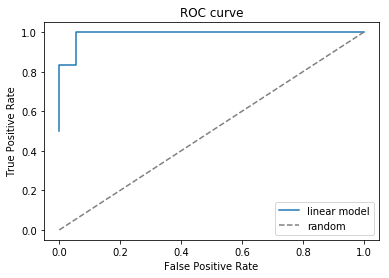

In [46]:
pylab.plot(fpr,tpr,label="linear model")
pylab.plot([0,1],[0,1],'--',color="grey",label="random")
pylab.xlim([-0.05,1.05])
pylab.ylim([-0.05,1.05])
pylab.xlabel("False Positive Rate")
pylab.ylabel("True Positive Rate")
pylab.title("ROC curve")
pylab.legend(loc="lower right")

In [47]:
metrics.roc_auc_score(clf_test_labels,prediction)

0.97222222222222221

In [48]:
metrics.roc_auc_score(clf_test_labels,probability_predictions[:,1])

0.9907407407407407

In [49]:
metrics.average_precision_score(clf_test_labels,prediction)

0.92307692307692313

In [50]:
metrics.log_loss(clf_test_labels,probability_predictions[:,1])

0.28012062447668079

In [51]:
regressor=linear_model.SGDRegressor(random_state=1,n_iter=20)

In [52]:
regressor.fit(reg_train_data,reg_train_labels)

C:\Users\dim\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=20, penalty='l2',
       power_t=0.25, random_state=1, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [53]:
reg_predictions=regressor.predict(reg_test_data)

In [54]:
print reg_test_labels

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]


In [56]:
print reg_predictions

[ -1.46503565   5.75776789 -50.13234306   5.05646094 -24.09370893
  -8.34831546  61.77254998 -21.98350565  30.65112022 -39.25972497
 -17.19337022  30.94178225  26.98820076  -6.08321732  -3.46551    -78.9843398
  84.80190097  14.80638314  22.91302375 -89.63572717  14.5954632
  31.64431951  95.81031534  21.5037679  -43.1101736  -95.06972123
  86.70086546   0.47837761 -16.44594704 -22.72581879]


In [57]:
metrics.mean_absolute_error(reg_test_labels,reg_predictions)

3.748761311885298

In [58]:
metrics.mean_squared_error(reg_test_labels,reg_predictions)

24.114925597460914

In [59]:
sqrt(metrics.mean_squared_error(reg_test_labels,reg_predictions))

4.9106950218335603

In [61]:
metrics.r2_score(reg_test_labels,reg_predictions)

0.98931761505469495